In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
price = pd.read_csv("../data/curated/prediction_house.csv")
price_apart = pd.read_csv("../data/curated/prediction_apartment.csv")

In [3]:
price.head()
price_apart.head()

,Unnamed: 0,suburb,price2022,price2023,price2024,price2025
0,0,EAST MELBOURNE,495,584.05725,570.34160,569.9448
1,1,EAST MELBOURNE,495,584.05725,570.34160,569.9448
2,2,EAST MELBOURNE,420,558.12630,579.87866,581.3294
3,3,EAST MELBOURNE,420,558.12630,579.87866,581.3294
4,4,EAST MELBOURNE,550,584.05725,570.34160,569.9448


House in Top10 growth rate suburbs

In [4]:
# remove duplications
price = price.drop_duplicates(keep='first')

# group suburb
a= pd.DataFrame(price['price2022'].groupby(price['suburb']).mean().reset_index())
b = pd.DataFrame(price['price2023'].groupby(price['suburb']).mean().reset_index())


newprice = pd.merge(a,b, how='left')

newprice.head()

,suburb,price2022,price2023
0,ABBOTSFORD,644.0,645.114508
1,AIRPORT WEST,420.0,378.206820
2,ALFREDTON,480.0,468.764600
3,ALTONA,440.0,451.117740
4,ALTONA MEADOWS,630.0,611.521820


## Formula


In [5]:
# calculate growth rate based on formula
newprice['growth rate(%)'] = ((newprice['price2023']- (newprice['price2022'])) / newprice['price2022']) *100

In [6]:
# find suburbs with highest growth rate
newprice = newprice.sort_values(by="growth rate(%)" , ascending=False)

In [7]:
newprice.head(30)

,suburb,price2022,price2023,growth rate(%)
27,CAIRNLEA,390.000000,525.579000,34.763846
80,LALOR,500.000000,633.104500,26.620900
85,MEADOW HEIGHTS,410.000000,516.060550,25.868427
31,CAROLINE SPRINGS,491.000000,566.378700,15.352077
109,RINGWOOD EAST,550.000000,627.564000,14.102545
99,NOBLE PARK NORTH,562.500000,640.755650,13.912116
93,MOUNT ELIZA,771.250000,871.860487,13.045120
32,CAULFIELD - NORTH,680.000000,762.544600,12.138912
124,THORNBURY,756.666667,847.375863,11.987999
121,TARNEIT,368.750000,410.132110,11.222267


### Remove outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d830d9be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d82f8f1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d830d9910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d82f8f760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d82f8fa30>],
 'means': []}

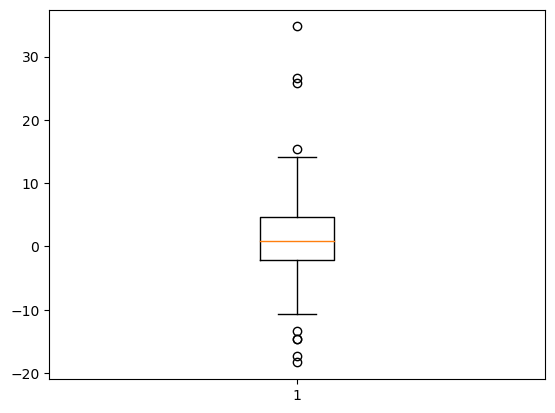

In [8]:
plt.boxplot(newprice['growth rate(%)'])

From the boxplot above, we can see any outliers. However, we should remove price that is greater than 100.

In [9]:
newprice = newprice[newprice['growth rate(%)']<=100]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d833e0fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d833f15b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d833e0cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d833f1b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d833f1e50>],
 'means': []}

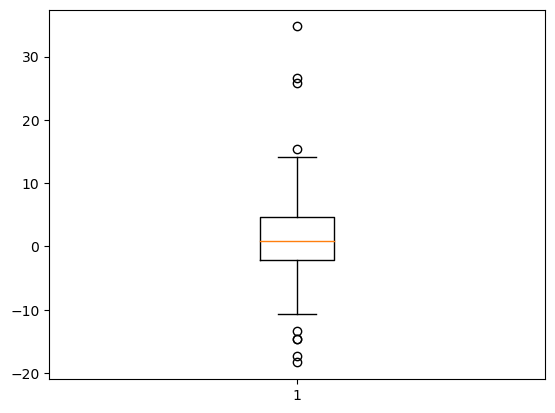

In [10]:
plt.boxplot(newprice['growth rate(%)'])

### Bar plot show top 10 suburb

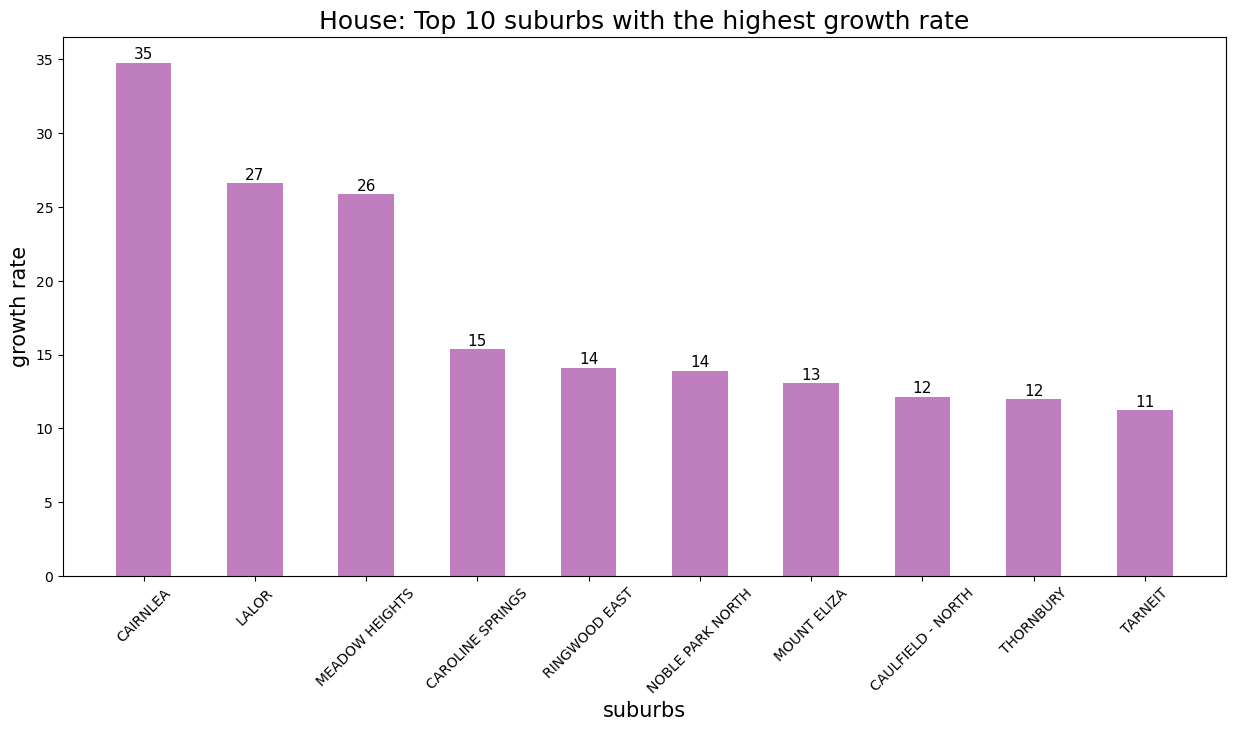

In [11]:
# plot the relationship between income growth rate and top10 suburb
df1 = newprice[['suburb','growth rate(%)']]
y = df1['growth rate(%)'][:10]
x = df1['suburb'][:10]

fig = plt.figure(figsize =(15, 7))
plt.bar(x, y, alpha=0.5, width = 0.5, linewidth = 2, color = 'purple')
plt.title('House: Top 10 suburbs with the highest growth rate', fontsize= 18)
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.xticks(rotation = 45)
plt.xlabel('suburbs', fontsize = 15)
plt.ylabel('growth rate', fontsize = 15)
plt.savefig("../plots/house growth rate.png")
plt.show()


In [28]:
# find the top 10 suburb
print("House(Growth Rate)")
for i in df1['suburb'][:10]:
    print('Top10suburb is %s' % i)


House(Growth Rate)
Top10suburb is CAIRNLEA
Top10suburb is LALOR
Top10suburb is MEADOW HEIGHTS
Top10suburb is CAROLINE SPRINGS
Top10suburb is RINGWOOD EAST
Top10suburb is NOBLE PARK NORTH
Top10suburb is MOUNT ELIZA
Top10suburb is CAULFIELD - NORTH
Top10suburb is THORNBURY
Top10suburb is TARNEIT


### Apartment in Top10 Growth Rate suburbs

In [13]:
# we do the same for apartment 
price_apart = price_apart.drop_duplicates(keep= 'first')

c = pd.DataFrame(price_apart['price2022'].groupby(price_apart['suburb']).mean().reset_index())
d = pd.DataFrame(price_apart['price2023'].groupby(price_apart['suburb']).mean().reset_index())


newprice_apart = pd.merge(c,d, how='left')

newprice_apart.head()

,suburb,price2022,price2023
0,ABBOTSFORD,482.916667,523.372770
1,ALTONA,280.000000,434.590640
2,ALTONA MEADOWS,320.000000,379.303800
3,ALTONA NORTH,525.000000,498.197140
4,ARMADALE,539.583333,568.437928


In [14]:
newprice_apart['growth rate(%)'] = ((newprice_apart['price2023']- (newprice_apart['price2022'])) / newprice_apart['price2022']) *100

In [15]:
newprice_apart = newprice_apart.sort_values(by="growth rate(%)" , ascending=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d7df6fa00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d7df6fe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d7df6f730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d7df7e400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d7df7e6d0>],
 'means': []}

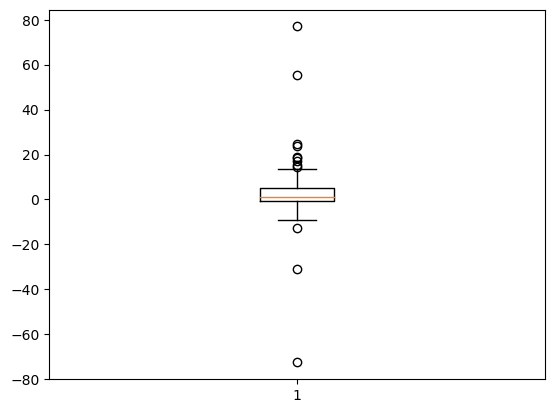

In [16]:
# check for outliers
plt.boxplot(newprice_apart['growth rate(%)'])

In [ ]:
newprice_apart = newprice_apart[newprice_apart['growth rate(%)']<=100]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d7dfc6640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d7dfd6f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d7dfd67f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d8429b520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d8429b7f0>],
 'means': []}

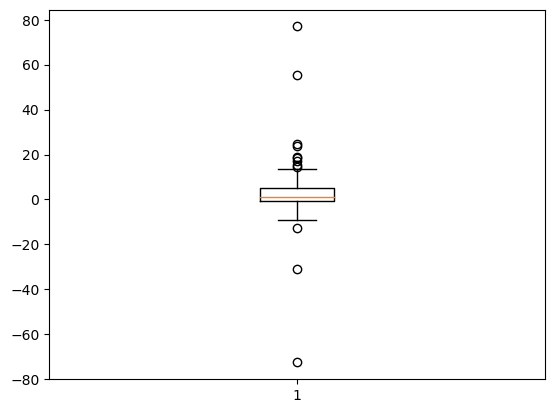

In [ ]:
plt.boxplot(newprice_apart['growth rate(%)'])

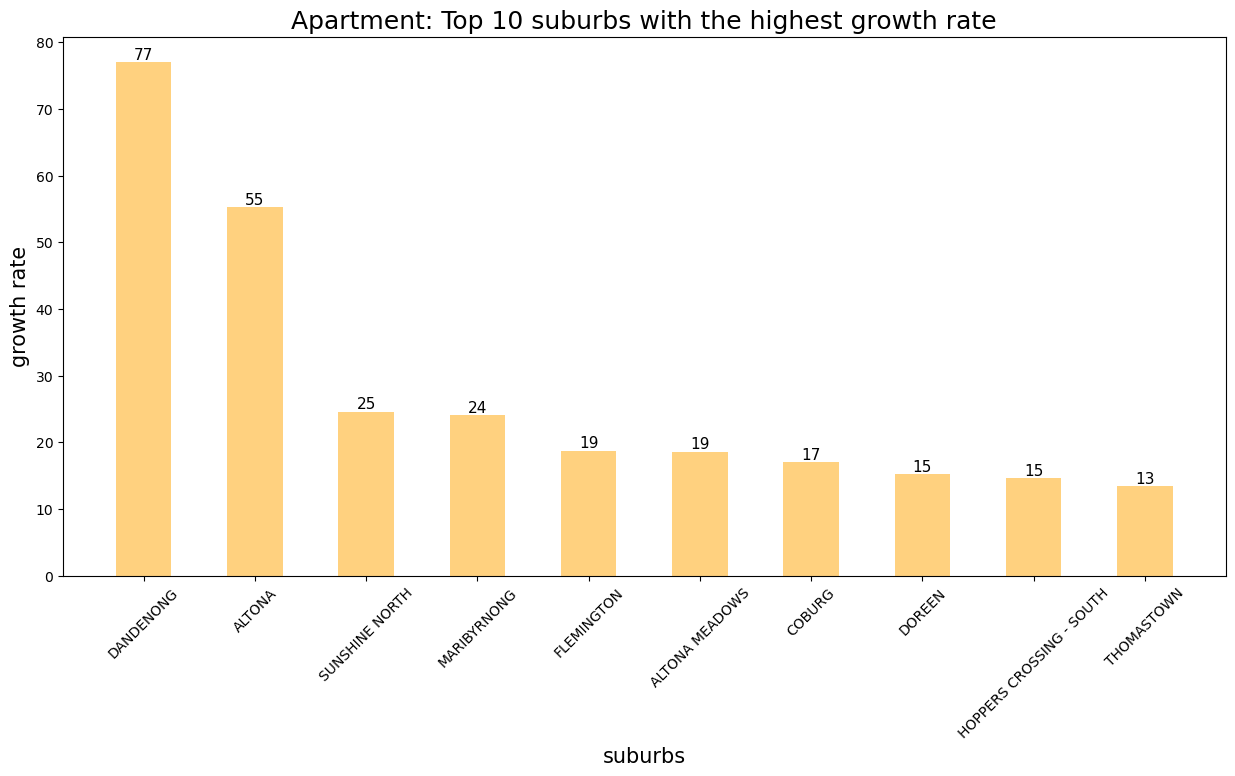

In [ ]:
# plot the relationship between income growth rate and top10 suburb
df2 = newprice_apart[['suburb','growth rate(%)']]
y = df2['growth rate(%)'][:10]
x = df2['suburb'][:10]

fig = plt.figure(figsize =(15, 7))
plt.bar(x, y, alpha=0.5, width = 0.5, linewidth = 2, color = 'orange')
plt.title('Apartment: Top 10 suburbs with the highest growth rate', fontsize= 18)
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.xlabel('suburbs', fontsize = 15)
plt.ylabel('growth rate', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()
plt.savefig("../plots/apartment growth rate.png")

In [29]:
print("Apartment(Growth Rate)")
for i in df2['suburb'][:10]:
    print('Top10suburb is %s' % i)

Apartment(Growth Rate)
Top10suburb is DANDENONG
Top10suburb is ALTONA
Top10suburb is SUNSHINE NORTH
Top10suburb is MARIBYRNONG
Top10suburb is FLEMINGTON
Top10suburb is ALTONA MEADOWS
Top10suburb is COBURG
Top10suburb is DOREEN
Top10suburb is HOPPERS CROSSING - SOUTH
Top10suburb is THOMASTOWN
